In [2]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pandas.api.types import CategoricalDtype

In [4]:
#load the medical data into pandas dataframe
df = pd.read_csv('medical_raw_data.csv')
df_original=df.copy
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [5]:
#drop duplicate column unamed, keep CaseOrder for original sort order
df.drop(columns='Unnamed: 0', inplace = True)

In [6]:
#look for duplicated value
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [7]:
#Look for Duplicate columns
df.columns.duplicated().any()

False

In [8]:
#Look for dupicated rows
df.duplicated().any()

False

In [9]:
#Verify Customer ID is unique
df.Customer_id.value_counts().count()

10000

In [10]:
#Verify Interaction is unique
df.Interaction.value_counts().count()

10000

In [11]:
#Verify UID is unique
df.UID .value_counts().count()

10000

In [12]:
#Examine columns for misspelling in categorical variables using the unique() method
df.Area.unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [13]:
df.Timezone.unique()

array(['America/Chicago', 'America/New_York', 'America/Los_Angeles',
       'America/Indiana/Indianapolis', 'America/Detroit',
       'America/Denver', 'America/Nome', 'America/Anchorage',
       'America/Phoenix', 'America/Boise', 'America/Puerto_Rico',
       'America/Yakutat', 'Pacific/Honolulu', 'America/Menominee',
       'America/Kentucky/Louisville', 'America/Indiana/Vincennes',
       'America/Toronto', 'America/Indiana/Marengo',
       'America/Indiana/Winamac', 'America/Indiana/Tell_City',
       'America/Sitka', 'America/Indiana/Knox',
       'America/North_Dakota/New_Salem', 'America/Indiana/Vevay',
       'America/Adak', 'America/North_Dakota/Beulah'], dtype=object)

In [14]:
df.Job.unique()

array(['Psychologist, sport and exercise', 'Community development worker',
       'Chief Executive Officer', 'Early years teacher',
       'Health promotion specialist', 'Corporate treasurer',
       'Hydrologist', 'Psychiatric nurse', 'Computer games developer',
       'Production assistant, radio', 'Contractor',
       'Surveyor, planning and development',
       'English as a second language teacher', 'Actuary', 'Media planner',
       'Fast food restaurant manager', 'Horticulturist, commercial',
       'Secretary, company', 'Designer, graphic', 'Personnel officer',
       'Telecommunications researcher', 'Restaurant manager, fast food',
       'Surveyor, minerals', 'Architectural technologist',
       'Therapist, speech and language', 'Accounting technician',
       'Glass blower/designer', 'Travel agency manager', 'Illustrator',
       'Police officer', 'Accountant, chartered public finance',
       'Sport and exercise psychologist', 'Pensions consultant',
       'Community educat

In [15]:
df.Education.unique()

array(['Some College, Less than 1 Year',
       'Some College, 1 or More Years, No Degree',
       'GED or Alternative Credential', 'Regular High School Diploma',
       "Bachelor's Degree", "Master's Degree",
       'Nursery School to 8th Grade',
       '9th Grade to 12th Grade, No Diploma', 'Doctorate Degree',
       "Associate's Degree", 'Professional School Degree',
       'No Schooling Completed'], dtype=object)

In [16]:
df.Marital.unique()

array(['Divorced', 'Married', 'Widowed', 'Never Married', 'Separated'],
      dtype=object)

In [17]:
df.Soft_drink.unique()

array([nan, 'No', 'Yes'], dtype=object)

In [18]:
df.Initial_admin.unique()

array(['Emergency Admission', 'Elective Admission',
       'Observation Admission'], dtype=object)

In [19]:
df.HighBlood.unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df.Stroke.unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df.Complication_risk.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [22]:
df.Overweight.unique()

array([ 0.,  1., nan])

In [23]:
df.Arthritis.unique()

array(['Yes', 'No'], dtype=object)

In [24]:
df.Diabetes.unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df.Hyperlipidemia.unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df.BackPain.unique()

array(['Yes', 'No'], dtype=object)

In [27]:
df.Anxiety.unique()

array([ 1., nan,  0.])

In [28]:
df.Allergic_rhinitis.unique()

array(['Yes', 'No'], dtype=object)

In [29]:
df.Reflux_esophagitis.unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df.Asthma.unique()


array(['Yes', 'No'], dtype=object)

In [31]:
df.Services.unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

In [32]:
df.Item1.value_counts()

Item1
4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: count, dtype: int64

In [33]:
df.Item2.value_counts()

Item2
3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: count, dtype: int64

In [34]:
df.Item3.value_counts()

Item3
4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: count, dtype: int64

In [35]:
df.Item4.value_counts()

Item4
3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: count, dtype: int64

In [36]:
df.Item5.value_counts()

Item5
4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: count, dtype: int64

In [37]:
df.Item6.value_counts()

Item6
4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: count, dtype: int64

In [38]:
#Find missing data
missing_values=df.isnull().sum()
print(missing_values)

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

In [39]:
df['Children'].describe()

count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

In [40]:
df['Age'].describe()

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [41]:
df['Income'].describe()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

In [42]:
df['Initial_days'].describe()

count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max        71.981486
Name: Initial_days, dtype: float64

In [43]:
#Impute missing values
#Fill missing value with median
#Convert Children to integer
df.Children=df.Children.astype('Int64')
df.Children=df.Children.fillna(df.Children.median())
#Convert Age to integer
df.Age=df.Age.astype('Int64')
df.Age=df.Age.fillna(df.Age.median())
df.Initial_days=df.Initial_days.fillna(df.Initial_days.median())
df.Income=df.Income.fillna(df.Income.median())

In [44]:
#Mode for Soft Drink
df.Soft_drink.mode()

0    No
Name: Soft_drink, dtype: object

In [45]:
#Impute missing value with mode
df.Soft_drink=df.Soft_drink.fillna('No')


In [46]:
#Mode for Overweight
df.Overweight.mode()

0    1.0
Name: Overweight, dtype: float64

In [47]:
#Impute null values with mode
df.Overweight=df.Overweight.fillna(1.0)
df.Overweight.unique()

array([0., 1.])

In [48]:
#Mode for anxiety
df.Anxiety.mode()

0    0.0
Name: Anxiety, dtype: float64

In [49]:
#Impute Anxiety with mode value
df.Anxiety=df.Anxiety.fillna(0.0)
df.Anxiety.unique()

array([1., 0.])

In [50]:
#Verify there are no more missing values
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days    

In [51]:
#Zipcodes are integer rather than strings and have lost their leading 0's
#Convert zipcode to string from integer
df.Zip=df.Zip.astype('str').str.zfill(5)

In [52]:
#Convert column Area to category
df.Area=df.Area.astype('category')

In [53]:
#Replace city-specific values with time-zone specific values
df.Timezone.replace({
"America/Puerto_Rico" : "US - Puerto Rico",
"America/New_York": "US - Eastern",
"America/Detroit" : "US - Eastern",
"America/Indiana/Indianapolis" : "US - Eastern",
"America/Indiana/Vevay" : "US - Eastern",
"America/Indiana/Vincennes" : "US - Eastern",
"America/Kentucky/Louisville" : "US - Eastern",
"America/Toronto" : "US - Eastern",
"America/Indiana/Marengo" : "US - Eastern",
"America/Indiana/Winamac" : "US - Eastern",
"America/Chicago" : "US - Central",
"America/Menominee" : "US - Central",
"America/Indiana/Knox" : "US - Central",
"America/Indiana/Tell_City" : "US - Central",
"America/North_Dakota/Beulah" : "US - Central",
"America/North_Dakota/New_Salem" : "US - Central",
"America/Denver" : "US - Mountain",
"America/Boise" : "US - Mountain",
"America/Phoenix" : "US - Arizona",
"America/Los_Angeles" : "US - Pacific",
"America/Nome" : "US - Alaskan",
"America/Anchorage" : "US - Alaskan",
"America/Sitka" : "US - Alaskan",
"America/Yakutat" : "US - Alaskan",
"America/Adak" : "US - Aleutian",
"Pacific/Honolulu" : "US - Hawaiian"    
}, inplace=True)

C:\Users\oviya\AppData\Local\Temp\ipykernel_28896\4248068734.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Timezone.replace({


In [54]:
#Convert Timezone to category
df.Timezone=df.Timezone.astype('category')

In [55]:
#Rename the survey columns with reference to the data dictionary provided
df.rename(columns={'Item1': 'Timely admission', 'Item2': 'Timely treatment ', 'Item3': 'Timely visits', 'Item4': 'Reliability', 'Item5': 'Options', 'Item6':'Hours of treatment ', 'Item7':'Courteous staff ', 'Item8':'Evidence of active listening from doctor '}, inplace=True)

In [56]:
#establish an ordered categorical datatype structure
survey_scores=CategoricalDtype(categories=['8', '7', '6', '5', '4', '3', '2', '1'], ordered=True)

In [57]:
df['Timely admission']=df['Timely admission'].map(str)
df['Timely admission']=df['Timely admission'].astype(survey_scores)


In [58]:
df['Timely treatment ']=df['Timely treatment '].astype(str)
df['Timely treatment ']=df['Timely treatment '].astype(survey_scores)

In [59]:
df['Timely visits']=df['Timely visits'].map(str)
df['Timely visits']=df['Timely visits'].astype(survey_scores)

In [60]:
df['Reliability']=df['Reliability'].map(str)
df['Reliability']=df['Reliability'].astype(survey_scores)

In [61]:
df['Options']=df['Options'].map(str)
df['Options']=df['Options'].astype(survey_scores)

In [62]:
df['Hours of treatment ']=df['Hours of treatment '].map(str)
df['Hours of treatment ']=df['Hours of treatment '].astype(survey_scores)

In [63]:
df['Courteous staff ']=df['Courteous staff '].map(str)
df['Courteous staff ']=df['Courteous staff '].astype(survey_scores)

In [64]:
df['Evidence of active listening from doctor ']=df['Evidence of active listening from doctor '].map(str)
df['Evidence of active listening from doctor ']=df['Evidence of active listening from doctor '].astype(survey_scores)

In [65]:
#Convert Job to category
df.Job=df.Job.astype('category')

In [66]:
#Convert education to category
df.Education=df.Education.astype('category')

In [67]:
#Convert employment to category
df.Employment=df.Employment.astype('category')

In [68]:
#Convert marital to category
df.Marital=df.Marital.astype('category')

In [69]:
#Convert initial Admin to category
df.Initial_admin=df.Initial_admin.astype('category')

In [70]:
#Convert Complicated risk to category
df.Complication_risk=df.Complication_risk.astype('category')

In [71]:
#Replace value of 'Prefer Not to Answer' with Non Binary
df.Gender.replace({
    'Prefer not to answer':'Non Binary'
}, inplace=True)

df.Gender.unique()

C:\Users\oviya\AppData\Local\Temp\ipykernel_28896\107937030.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Gender.replace({


array(['Male', 'Female', 'Non Binary'], dtype=object)

In [72]:
#Convert Gender to category
df.Gender=df.Gender.astype('category')

In [73]:
#covert services to category
df.Services=df.Services.astype('category')

In [74]:
#Convert the Overweight values to Yes/No
df.Overweight=df.Overweight.replace({0.0: 'No', 1.0: 'Yes'})
df.Overweight.head()

0     No
1    Yes
2    Yes
3     No
4     No
Name: Overweight, dtype: object

In [75]:
#Convert the Anxiety values to Yes/No
df.Anxiety=df.Anxiety.replace({0.0:'No', 1.0:'Yes'})
df.Anxiety.head()

0    Yes
1     No
2     No
3     No
4     No
Name: Anxiety, dtype: object

In [76]:
df.Initial_days=df.Initial_days.astype('int64')

In [77]:
df.TotalCharge=df.TotalCharge.round(2)

In [78]:
df.Additional_charges=df.Additional_charges.round(2)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   CaseOrder                                  10000 non-null  int64   
 1   Customer_id                                10000 non-null  object  
 2   Interaction                                10000 non-null  object  
 3   UID                                        10000 non-null  object  
 4   City                                       10000 non-null  object  
 5   State                                      10000 non-null  object  
 6   County                                     10000 non-null  object  
 7   Zip                                        10000 non-null  object  
 8   Lat                                        10000 non-null  float64 
 9   Lng                                        10000 non-null  float64 
 10  Population 

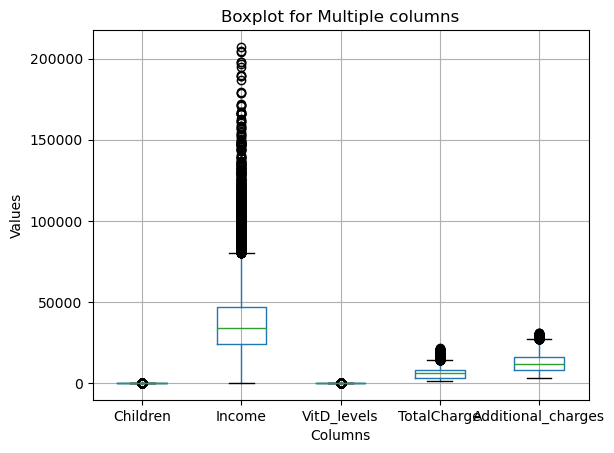

In [80]:
#Identify outliers for quantitative values CHildren, Income Vitamin D levels, Total and Additional charges
df[['Children', 'Income', 'VitD_levels', 'TotalCharge', 'Additional_charges']].boxplot()
plt.title('Boxplot for Multiple columns')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()

In [81]:
#Lets examine the Children values
df.Children.value_counts()

Children
1     4446
0     1880
3     1113
2     1094
4      739
8      157
7      154
6      145
5      126
9       83
10      63
Name: count, dtype: Int64

In [82]:
#Let's view the values
df.Income.describe()

count     10000.000000
mean      38872.450471
std       25042.796229
min         154.080000
25%       23956.162500
50%       33942.280000
75%       46466.797500
max      207249.130000
Name: Income, dtype: float64

Calculate the Interquarantile Range (IQR)
IQR= 75th - 25th percentile
IQR = 46,466.80 - 23,956.16 = 22,510.64

Lower bound = 25th percentile - 1.5 * IQR 
Upper bound = 75th percentile + 1.5 * IQR

Calculate the bounds:
Lower Bound: 23956.16-1.5 * 22,510.64 = -9,809.80
Upper Bound: 46,466.79 -1.5 * 22,510.64 = 80,232.77


In [84]:
#mitigate the outlier for Income column
# Check for any unexpected tuple-like entries, should return 0 if there are no tuple like rows
df['Income'].apply(lambda x: isinstance(x, tuple)).sum()


0

In [85]:
upper_cap = 80232.77

In [86]:
# Apply the cap
df['Income'] = df['Income'].apply(lambda x: min(x, upper_cap))

In [87]:
print(df['Income'].max()) 

80232.77


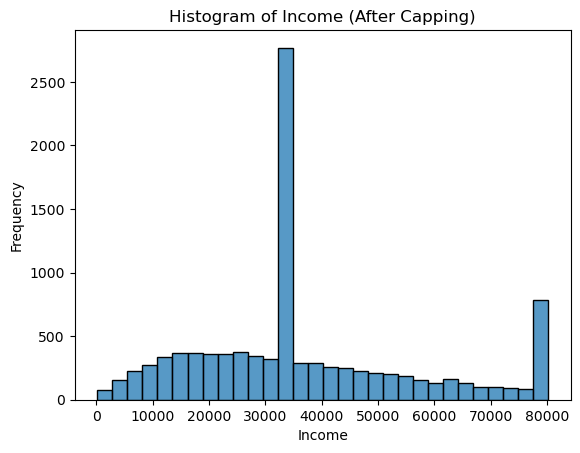

In [88]:
sns.histplot(df['Income'], bins=30, kde=False)

plt.title('Histogram of Income (After Capping)')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.show()

In [89]:
#Lets observe the vitamin d levels
df.VitD_levels.describe()

count    10000.000000
mean        19.412675
std          6.723277
min          9.519012
25%         16.513171
50%         18.080560
75%         19.789740
max         53.019124
Name: VitD_levels, dtype: float64

In [90]:
#lets look at at total charges
df.TotalCharge.describe()

count    10000.000000
mean      5891.538279
std       3377.558157
min       1256.750000
25%       3253.237500
50%       5852.250000
75%       7614.985000
max      21524.220000
Name: TotalCharge, dtype: float64

Calculate the Interquarantile Range IQR
IQR= 75th - 25th percentile 7614.98 - 3253.23 =  4,361.75
Lower bound = 25th percentile - 1.5 * IQR  3253.23 - 1.5 * 4361.75 = -3,289.395
Upper bound = 75th percentile + 1.5 * IQR  7614.98 + 1.5 * 4361.75 = 14,157.605

In [92]:
#mitigate the outlier for Income column
# Check for any unexpected tuple-like entries, should return 0 if there are no tuple like rows
df['TotalCharge'].apply(lambda x: isinstance(x, tuple)).sum()

0

In [93]:
#upper cap
TotalCharge_upper_cap= 14157.605

In [94]:
df['TotalCharge'] = df['TotalCharge'].apply(lambda x: min(x, TotalCharge_upper_cap))

In [95]:
print(df.TotalCharge.max())

14157.605


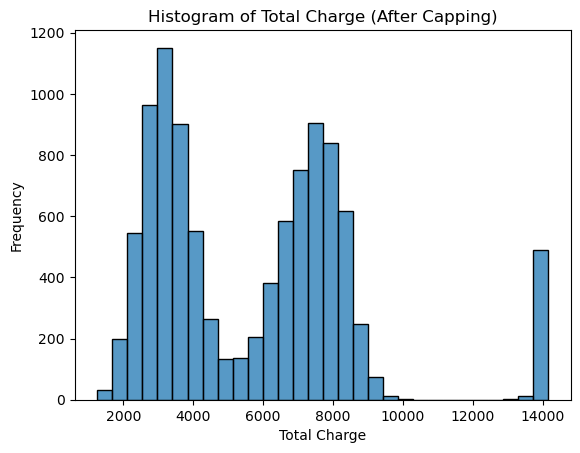

In [96]:
sns.histplot(df['TotalCharge'], bins=30, kde=False)

plt.title('Histogram of Total Charge (After Capping)')
plt.xlabel('Total Charge')
plt.ylabel('Frequency')

plt.show()

In [97]:
#Lets observe the Additional charges value 
df.Additional_charges.describe()

count    10000.000000
mean     12934.528588
std       6542.601553
min       3125.700000
25%       7986.485000
50%      11573.980000
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

Calculate the Interquarantile Range IQR
IQR= 75th - 25th percentile  15626.49 - 7986.48 = 7,640.01
Lower bound = 25th percentile - 1.5 * IQR  7986.48 - 1.5 * 7,640.01  = -3,473.535
Upper bound = 75th percentile + 1.5 * IQR  15626.49 + 1.5 * 7,640.01 = 27,086.505

In [99]:
#Mitigate the outliers for Additional charge
# Check for any unexpected tuple-like entries, should return 0 if there are no tuple like rows
df['Additional_charges'].apply(lambda x: isinstance(x, tuple)).sum()


0

In [100]:
Additionalcharge_upper_bound = 27086.505

In [101]:
df['Additional_charges'] = df['Additional_charges'].apply(lambda x: min(x, Additionalcharge_upper_bound))

In [102]:
print(df.Additional_charges.max())

27086.505


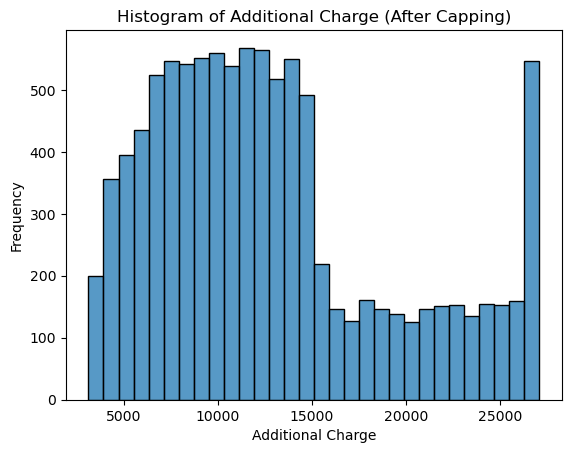

In [103]:
sns.histplot(df['Additional_charges'], bins=30, kde=False)

plt.title('Histogram of Additional Charge (After Capping)')
plt.xlabel('Additional Charge')
plt.ylabel('Frequency')

plt.show()

In [104]:
#save dataframe to CSV
#df.to_csv('output.csv', index=False)

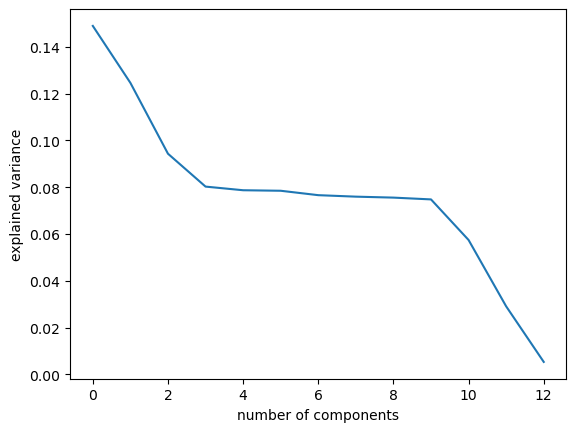

In [105]:
#Store all quantitative variables in a new data frame for the Principal Component Analysis
df_pca=df[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']]
#Normalize the column
df_normalized=(df_pca-df_pca.mean())/df_pca.std()
pca = PCA(n_components=df_pca.shape[1])
pca.fit(df_normalized)
output_pca=pd.DataFrame(pca.transform(df_normalized),columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
#screeplot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()


In [106]:
#Generate dateframe of each component of the PCA and its loading
loadings = pd.DataFrame(pca.components_.T,
     columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'],
     index=df_pca.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Lat,-0.023421,-0.008522,-0.715205,0.127201,-0.050439,-0.015836,-0.047055,0.050754,0.016144,-0.054841,0.678680,-0.014851,0.000032
Lng,-0.006528,0.018714,0.271514,-0.607254,-0.509109,-0.056214,0.298856,0.165324,-0.042379,0.169615,0.384051,0.008163,0.002107
Population,0.029256,-0.025514,0.630842,0.287223,0.295469,0.039597,-0.190992,-0.042483,0.070729,-0.076578,0.616255,-0.015587,-0.001470
Children,0.003016,0.010993,0.007206,0.271665,0.269214,-0.180949,0.781223,0.392495,0.236142,0.023036,-0.006422,-0.008473,-0.005369
Age,0.082527,0.700963,0.006858,0.013960,-0.014541,-0.026052,-0.016691,-0.000913,-0.020491,-0.020822,-0.003170,-0.706478,-0.021298
Income,-0.005567,-0.007173,0.023734,0.195512,-0.111814,0.565693,0.453090,-0.393175,-0.494670,-0.144838,0.053548,-0.014036,-0.000562
VitD_levels,0.486579,-0.041742,-0.056570,-0.297710,0.146981,0.347434,0.044781,-0.050354,0.416553,-0.329168,0.001274,-0.025003,0.490221
Doc_visits,-0.006078,0.012811,0.012515,0.150557,-0.101609,0.603049,-0.220308,0.704004,-0.061391,0.227609,-0.056748,-0.005437,0.000373
Full_meals_eaten,-0.013250,0.037567,-0.104503,-0.315614,0.558044,0.174872,0.054461,-0.208301,-0.038400,0.702036,0.071365,-0.010324,-0.001691
VitD_supp,0.036209,0.009515,0.028556,0.374503,-0.453366,0.131907,0.038205,-0.337548,0.577217,0.430785,-0.020460,-0.003953,-0.001482


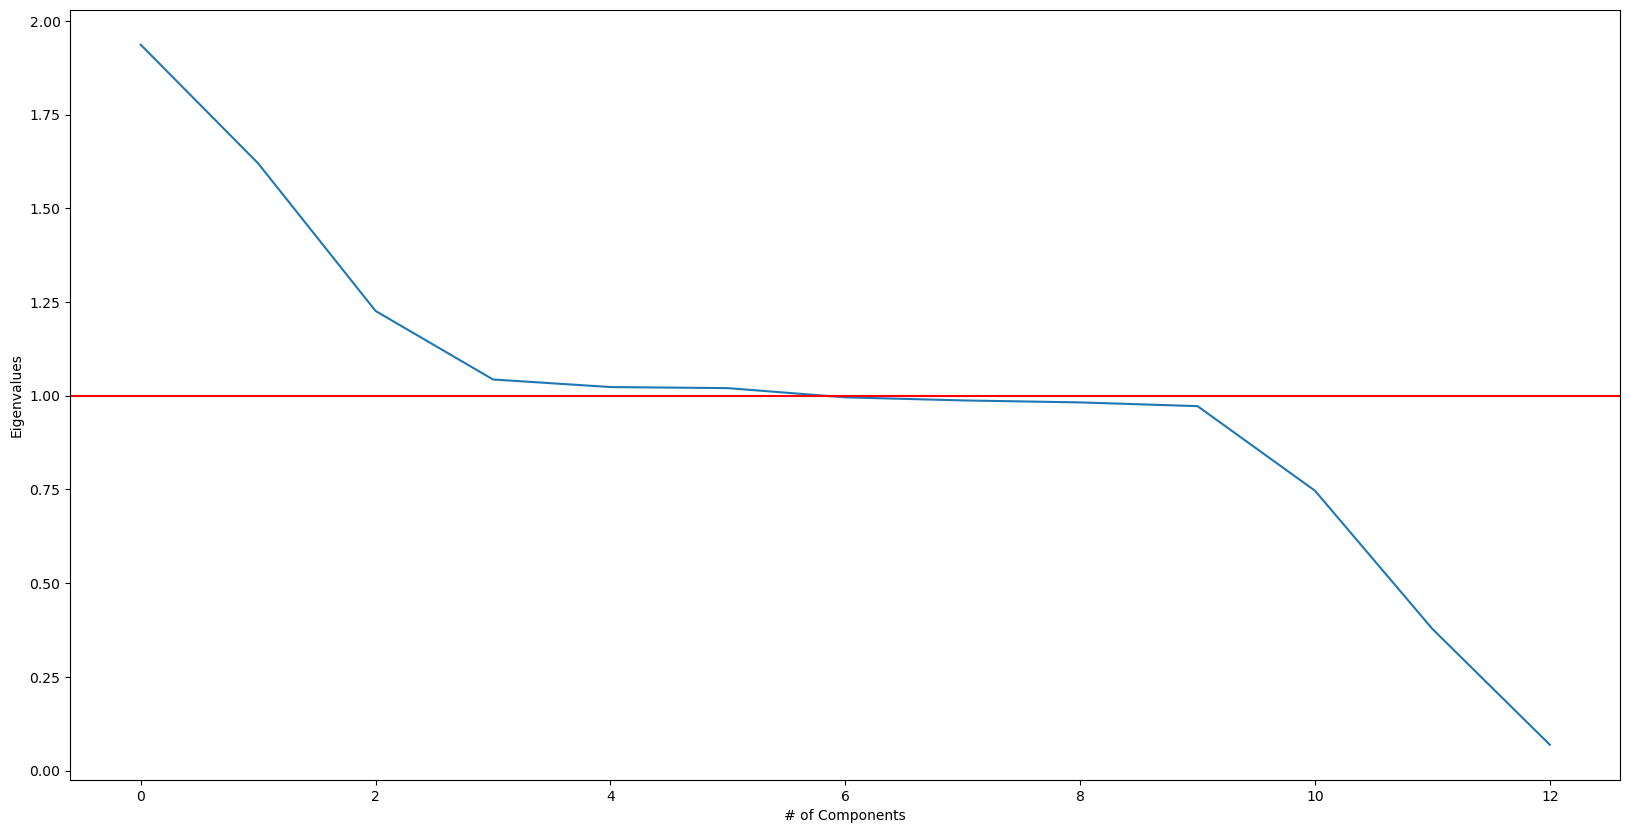

In [107]:
#Eigen values
cov_matrix=np.dot(df_normalized.T, df_normalized)/df_pca.shape[0]
eigenvalues=[np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
plt.figure(figsize = [20,10])
plt.plot(eigenvalues)
plt.xlabel('# of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='red')
plt.show()

In [108]:
eigenvalues


[1.9362684591047992,
 1.6197129547423872,
 1.2259891373858702,
 1.043259113118788,
 1.0230374527265635,
 1.020145496898612,
 0.9956160002216436,
 0.9873796313220091,
 0.9820584805144412,
 0.9720823729012029,
 0.7465263198014946,
 0.37776491655603966,
 0.06885966470608908]